In [1]:
import numpy as np
import h5py
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import DataFrame

from fancy import Data, Results
from fancy.plotting import AllSkyMap, Corner
from fancy.plotting.colours import *

# to match paper style
plt.style.use('minimalist') 

In [2]:
# Define output files
# sim_output_file = '../output/joint_model_simulation.h5'
# arrival_output_file = '../output/arrival_direction_fit.h5'
# joint_output_file = '../output/joint_fit.h5'

source_type = "SBG_23"
detector_type = "TA2015"

random_seeds = [19990308, 16510456, 98362168, 99999999]
# random_seeds = [96532384, 26842266, 15879324, 77777777]
exp_factors = [0.5, 1., 2., 4., 5., 7.]

check_plot = False

In [3]:


# arrays to store source association results for each seed
Fa_all = []
Fj_all = []
# F_true = []
for exp_factor in exp_factors:
    F_a = []
    F_j = []
    for random_seed in random_seeds:
        # sim_output_file = '../output/joint_model_simulation_{0}_{2}_rs{1}.h5'.format(source_type, random_seed, detector_type)
        # arrival_output_file = '../output/arrival_direction_fit_{0}_{2}_rs{1}.h5'.format(source_type, random_seed, detector_type)
        # joint_output_file = '../output/joint_fit_{0}_{2}_rs{1}.h5'.format(source_type, random_seed, detector_type)

        sim_output_file = '../output/joint_model_simulation_{0}_{2}_rs{1:d}_epsx{3:.0f}.h5'.format(source_type, random_seed, detector_type, exp_factor)
        arrival_output_file = '../output/arrival_direction_fit_{0}_{2}_rs{1:d}_epsx{3:.0f}.h5'.format(source_type, random_seed, detector_type, exp_factor)
        joint_output_file = '../output/joint_fit_{0}_{2}_rs{1:d}_epsx{3:.0f}.h5'.format(source_type, random_seed, detector_type, exp_factor)

        # Get f samples for both models and true f value.
        f_a = Results(arrival_output_file).get_chain(['f'])['f']
        f_j = Results(joint_output_file).get_chain(['f'])['f']
        f_true = Results(sim_output_file).get_truths(['f'])['f']

        # append
        F_a.append(f_a)
        F_j.append(f_j)
        # F_true.append(f_true)

        if check_plot:
            fig, ax = plt.subplots()
            fig.set_size_inches((6, 4))

            sns.distplot(f_a, hist = False, 
                        kde_kws = {'shade' : True, 'lw' : 2, 'zorder' : 0}, 
                        color = grey, label = 'arrival direction')
            sns.distplot(f_j, hist = False, 
                        kde_kws = {'shade' : True, 'lw' : 2, 'zorder' : 1}, 
                        color = purple, label = 'joint')
            ax.axvline(f_true, 0, 10, color = 'k', zorder = 3, lw = 2., alpha = 0.7)

            ax.set_xlim(0, 1)
            # ax.set_ylim(0, 10)
            ax.set_xlabel('$f$')
            ax.set_ylabel('$P(f | \hat{E}, \hat{\omega})$')
            ax.legend(bbox_to_anchor = (0.65, 1.0));

    # evaluate cumulative histogram and normalize by # random seeds
    norm = len(random_seeds)
    # norm = 1.
    F_a_cumul = np.sum(np.array(F_a), axis=0) / norm
    F_j_cumul = np.sum(np.array(F_j), axis=0) / norm

    Fa_all.append(F_a_cumul)
    Fj_all.append(F_j_cumul)    



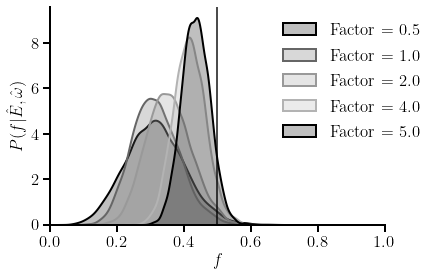

In [4]:
# plot cumulative distribution
fig, ax = plt.subplots()
fig.set_size_inches((6, 4))

for i, Fa in enumerate(Fa_all):
    sns.distplot(Fa, hist = False, 
                kde_kws = {'shade' : True, 'lw' : 2, 'zorder' : 0}, label = "Factor = {0:.1f}".format(exp_factors[i]))

ax.axvline(f_true, 0, 10, color = 'k', zorder = 3, lw = 2., alpha = 0.7)

ax.set_xlim(0, 1)
# ax.set_ylim(0, 10)
ax.set_xlabel('$f$')
ax.set_ylabel('$P(f | \hat{E}, \hat{\omega})$')
ax.legend(bbox_to_anchor = (0.65, 1.0));

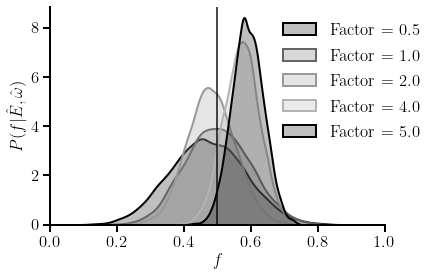

In [5]:
# plot cumulative distribution
fig, ax = plt.subplots()
fig.set_size_inches((6, 4))

for i, Fj in enumerate(Fj_all):
    sns.distplot(Fj, hist = False, 
                kde_kws = {'shade' : True, 'lw' : 2, 'zorder' : 0}, label = "Factor = {0:.1f}".format(exp_factors[i]))

ax.axvline(f_true, 0, 10, color = 'k', zorder = 3, lw = 2., alpha = 0.7)

ax.set_xlim(0, 1)
# ax.set_ylim(0, 10)
ax.set_xlabel('$f$')
ax.set_ylabel('$P(f | \hat{E}, \hat{\omega})$')
ax.legend(bbox_to_anchor = (0.65, 1.0));